In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #data visualization
import matplotlib.pyplot as plt


In [ ]:
#importing our data
df=pd.read_csv('/content/train.csv')

# Exploratory Data Analysis

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## PassengerId

In [ ]:
#let's divide the passengerid to group and number

df['group'] = df['PassengerId'].str.split('_',expand=True)[0]
df['number'] = df['PassengerId'].str.split('_',expand=True)[1]


In [ ]:
print(df['group'].value_counts())
print(df['number'].value_counts())

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: group, Length: 6217, dtype: int64
01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: number, dtype: int64


In [ ]:
#let's create a column in which we specify if the passenger is traveling alone or with family

group_list =df['group'].tolist()
traveling_state=[''] * len(group_list)

for group in set(group_list):
    if group_list.count(group)>1:
        indexes=[]
        for i in range(len(group_list)):

            if group_list[i]==group:
                indexes.append(i)

        for index in indexes:
            traveling_state[index]='family'

    else:
        traveling_state[group_list.index(group)]='alone'
df['traveling_state']=pd.DataFrame(traveling_state)
df=df.drop(['PassengerId','group','number'],axis=1)

([<matplotlib.patches.Wedge at 0x7f1266a0e6e0>,
 [Text(-0.18143592204911338, 1.0849336413763693, 'alone'),
  Text(0.18143602362793088, -1.0849336243891075, 'family')])

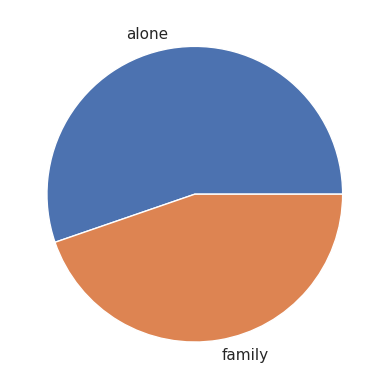

In [ ]:
#let's see the ratio of each of traveling states using a pieplot
traveling_state=df['traveling_state'].value_counts().tolist()
plt.pie(traveling_state,labels=df['traveling_state'].value_counts().keys())

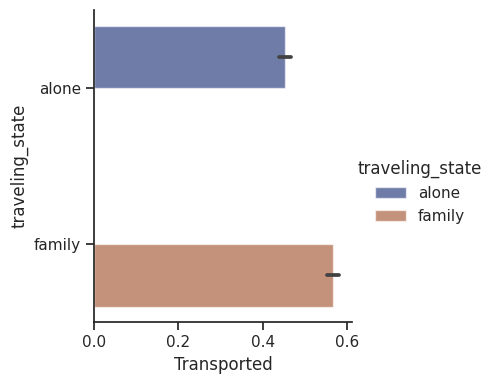

In [ ]:
#let's see which group of passengers had a better chance to be transported using a histogramme
sns.catplot(
    data=df, kind="bar",
    y="traveling_state", x="Transported", hue="traveling_state",
     palette="dark", alpha=.6, height=4,orient='h'
)

* most of the passengers are traveling alone
* seems like passengers who traveled as a family has more potentiel to be transported

## HomePlanet

In [ ]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,traveling_state
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,alone
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,alone
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,family
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,family
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,alone
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,alone
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,alone
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,family


([<matplotlib.patches.Wedge at 0x7f1266adf910>,
 [Text(-0.14445288072599838, 1.0904739177302503, 'Earth'),
  Text(-0.5456478714190157, -0.955127426271436, 'Europa'),
  Text(0.8752009735838737, -0.6663507003356715, 'Mars')])

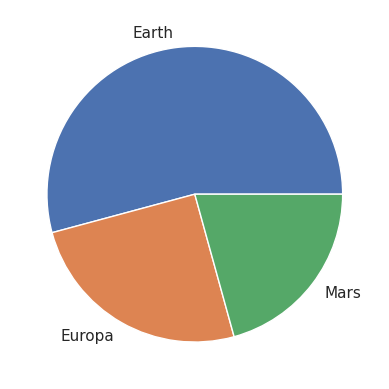

In [ ]:
#let's visualize the categories of HomePlanet
HomePlanet=df['HomePlanet'].value_counts().tolist()
HomePlanet
plt.pie(HomePlanet,labels=df['HomePlanet'].value_counts().keys())

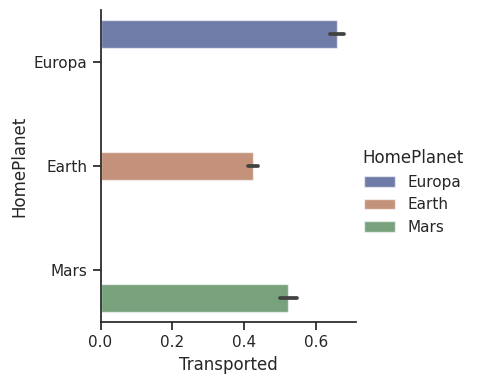

In [ ]:
#let's see which planet has more transported passengers
sns.catplot(data=df, kind="bar",
    y="HomePlanet", x="Transported", hue="HomePlanet",
     palette="dark", alpha=.6, height=4,orient='h'
    )

* even tho Earth has the most number of passengers , its passengers has the lowest chance to be transported
* Europa passengers are more likely to be transported

## CryoSleep

([<matplotlib.patches.Wedge at 0x7f12668ba260>,
 [Text(-0.47364804717575937, 0.9928028643223135, 'False'),
  Text(0.4736480471757592, -0.9928028643223135, 'True')])

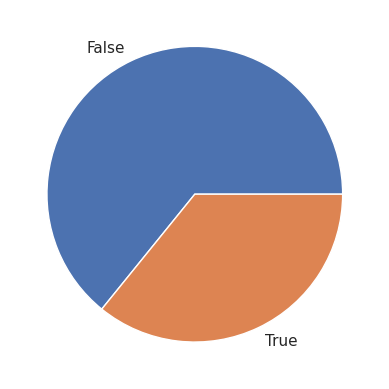

In [ ]:
#let's see if most passengers in cryosleep are confined to their cabins
plt.pie(df['CryoSleep'].value_counts().tolist(),labels=df['CryoSleep'].value_counts().keys())

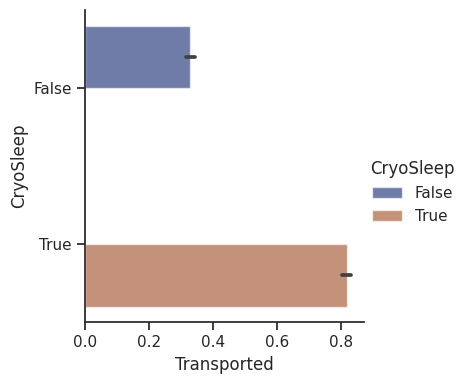

In [ ]:
#let's see who has more potentiel to be transported
sns.catplot(data=df, kind="bar",
    y="CryoSleep", x="Transported", hue="CryoSleep",
     palette="dark", alpha=.6, height=4,orient='h')

* turned out that most passengers are not in cryosleep
* even tho , people who are in cryosleep has more potentiel to be transported , it shows a high correlation

## Cabin

In [ ]:
#cabin is written in a deck/num/side form
#let's create a column for each to see the influence of these parameters on the transportation
df[['Deck','Num','Side']]=df['Cabin'].str.split('/',expand=True)

In [ ]:
df=df.drop('Cabin',axis=1)

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,traveling_state,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,alone,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,alone,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,family,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,family,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,alone,F,1,S


([<matplotlib.patches.Wedge at 0x7f1266804c10>,
 [Text(0.563101166796754, 0.9449428956038214, 'F'),
  Text(-1.0909530811175054, 0.14078840435285056, 'G'),
  Text(-0.4572256134793619, -1.0004722576755547, 'E'),
  Text(0.20066579478681268, -1.0815420652025407, 'B'),
  Text(0.7480764212939841, -0.8064624404793976, 'C'),
  Text(1.0256156918944175, -0.39763356566056557, 'D'),
  Text(1.0946807489543147, -0.1080465541737482, 'A'),
  Text(1.0999981191309014, -0.0020341849668980855, 'T')])

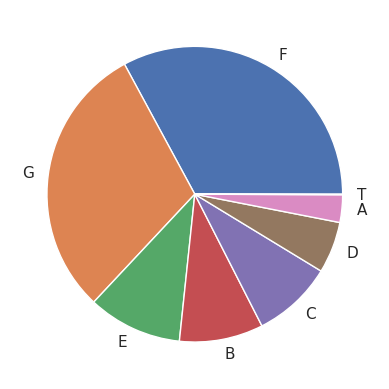

In [ ]:
#let's go deep in the Deck relation with transportation
plt.pie(df['Deck'].value_counts().tolist(),labels=df['Deck'].value_counts().keys())

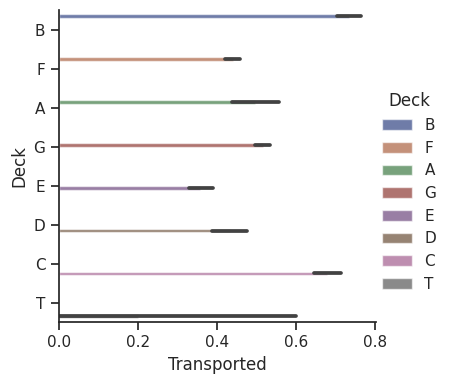

In [ ]:
sns.catplot(data=df, kind="bar",
    y="Deck", x="Transported", hue="Deck",
     palette="dark", alpha=.6, height=4,orient='h')

* passengers are mostly in G and F Decks even tho they are relatively inverse correlated with transported
* passengers who are in B and C has higher chances to be transported

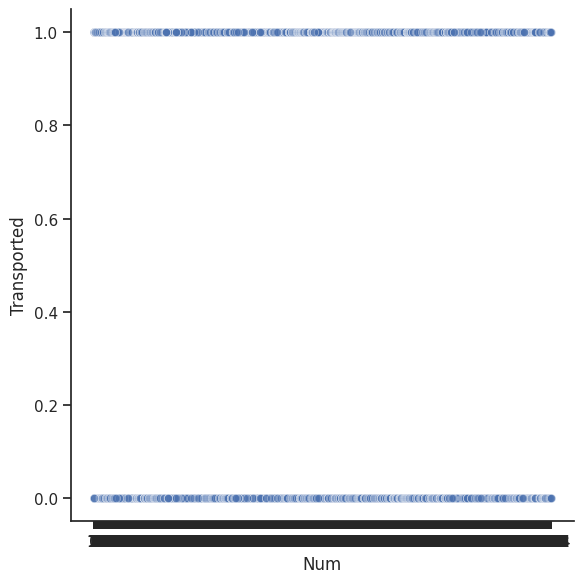

In [ ]:
#now we gonna explore the Num column
sns.relplot(x="Num", y="Transported",
             alpha=.5, palette="muted",
            height=6, data=df)

* clearly we can't extract insights from this column so we are going to drop it in the preprocessing phase


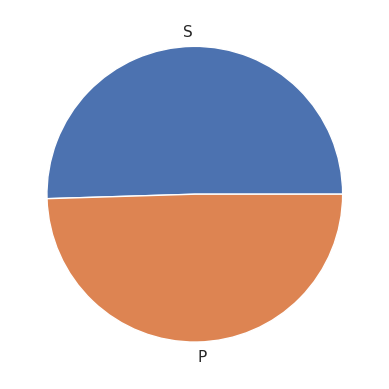

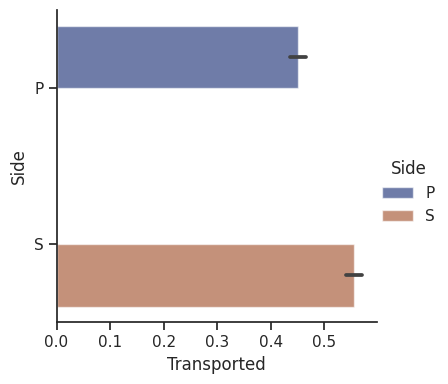

In [ ]:
#finaly at the side column
plt.pie(df['Side'].value_counts().tolist(),labels=df['Side'].value_counts().keys())
plt.show()
sns.catplot(data=df, kind="bar",
    y="Side", x="Transported", hue="Side",
     palette="dark", alpha=.6, height=4,orient='h')
plt.show()

* passengers seems to be divided in half , S and P
* the passenger in on side S he is more likely to be Transported , but not a big difference tho.

## Destination

([<matplotlib.patches.Wedge at 0x7f1264bda350>,
 [Text(-0.6324575589537547, 0.8999985756223496, 'TRAPPIST-1e'),
  Text(0.34470342064144743, -1.0445954010037022, '55 Cancri e'),
  Text(1.0528587716222633, -0.3185724517563615, 'PSO J318.5-22')])

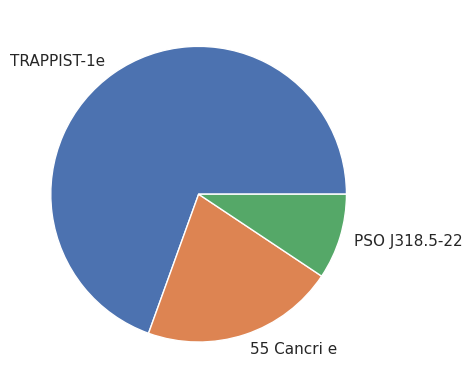

In [ ]:
#let's see where passengers like to travel the most
plt.pie(df['Destination'].value_counts().tolist(),labels=df['Destination'].value_counts().keys())

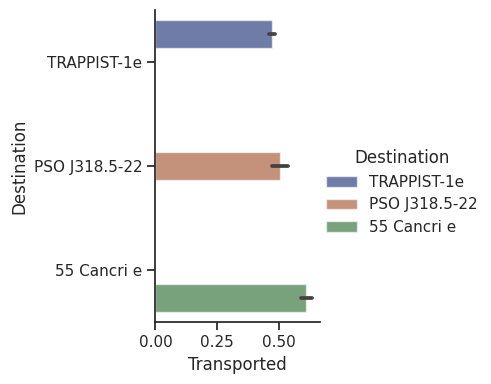

In [ ]:
#what destination has more chances for its passengers to be transported
sns.catplot(data=df, kind="bar",
    y="Destination", x="Transported", hue="Destination",
     palette="dark", alpha=.6, height=4,orient='h')

* passengers travel the most to trappist
* they don't seem to have a high chance to be tranported

## Age

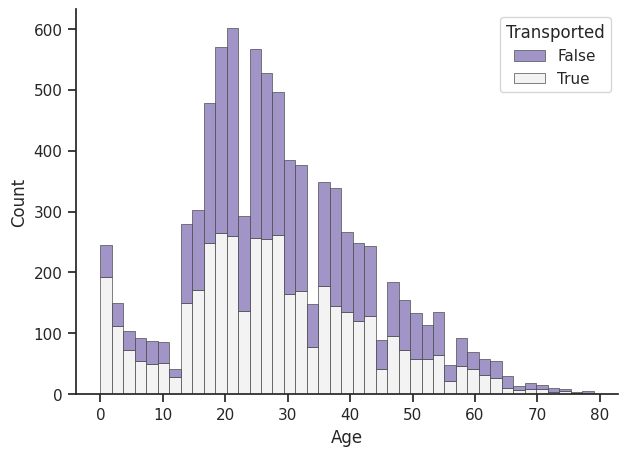

In [ ]:
#let's see how age is distributed
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(
    df,
    x="Age",
    hue="Transported",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)
plt.show()

* most of passengers are adults and the minority are kids and grown
* we can see that when a passenger age is less than 12 he has a high chance to be transported , note that we can
  make age a categorical column , kids and adults

In [ ]:
#let's make Age column categorical and analyse the result
df['Age']=np.where(df['Age']<12,'kid','adult')

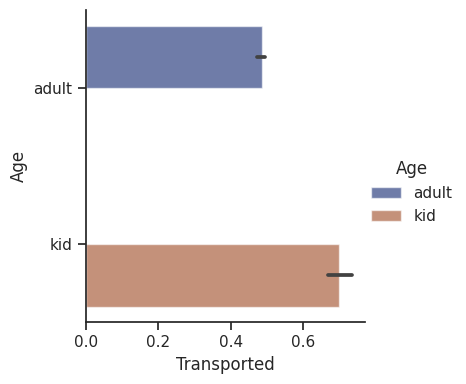

In [ ]:
sns.catplot(data=df, kind="bar",
    y="Age", x="Transported", hue="Age",
     palette="dark", alpha=.6, height=4,orient='h')

* our supposition is true

## VIP

([<matplotlib.patches.Wedge at 0x7f1264a10f10>,
 [Text(-1.0970190325929705, 0.08092738800173493, 'False'),
  Text(1.097019030698728, -0.08092741367931887, 'True')])

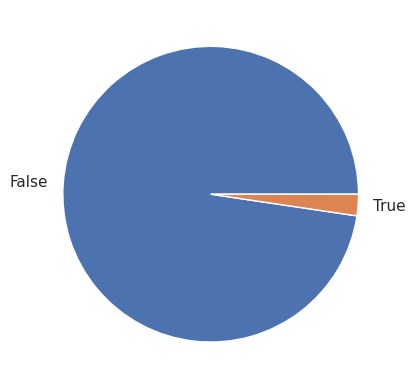

In [ ]:
#let's see how many passengers were vip
plt.pie(df['VIP'].value_counts().tolist(),labels=df['VIP'].value_counts().keys())

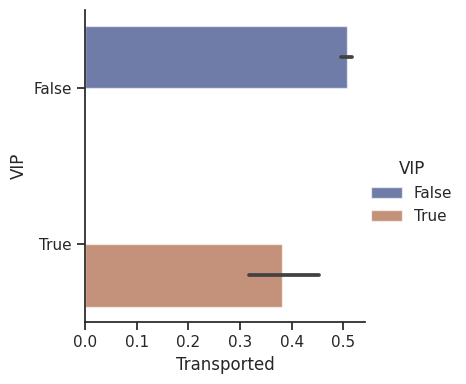

In [ ]:
sns.catplot(data=df, kind="bar",
    y="VIP", x="Transported", hue="VIP",
     palette="dark", alpha=.6, height=4,orient='h')

* vip passengers are a minority and they seem to have less chance to be transported

## RoomService , FoodCourt , ShoppingMall , Spa & VRDeck

<Axes: >

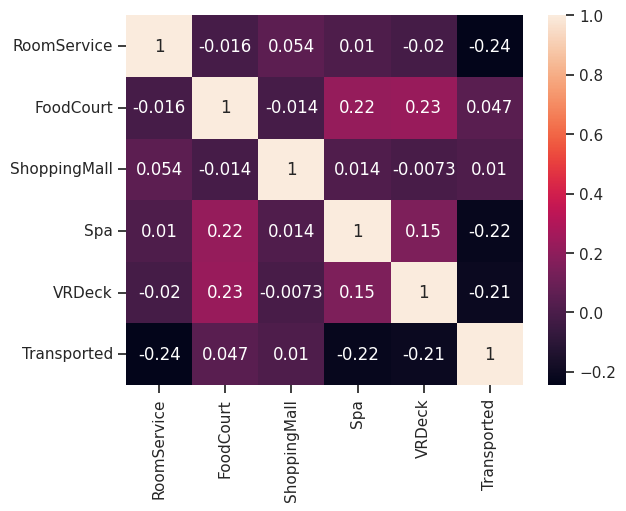

In [ ]:
#we will explore the correlation of these services with transported
sns.heatmap(df[['RoomService' , 'FoodCourt' , 'ShoppingMall' , 'Spa' , 'VRDeck','Transported']].corr(),annot=True)

* transported is correlated with the services except foodcourt and shopping mall

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8492 non-null   object 
 1   CryoSleep        8476 non-null   object 
 2   Destination      8511 non-null   object 
 3   Age              8693 non-null   object 
 4   VIP              8490 non-null   object 
 5   RoomService      8512 non-null   float64
 6   FoodCourt        8510 non-null   float64
 7   ShoppingMall     8485 non-null   float64
 8   Spa              8510 non-null   float64
 9   VRDeck           8505 non-null   float64
 10  Name             8493 non-null   object 
 11  Transported      8693 non-null   bool   
 12  traveling_state  8693 non-null   object 
 13  Deck             8494 non-null   object 
 14  Num              8494 non-null   object 
 15  Side             8494 non-null   object 
dtypes: bool(1), float64(5), object(10)
memory usage: 1.0+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
def finaldb(db) :
  le=LabelEncoder()
  db= db.drop(['FoodCourt','Num','ShoppingMall','Name'],axis=1)
  for c in db.columns:
    if (db[c].dtype != float):
      db[c]=le.fit_transform(db[c])
  return db


In [ ]:
df=finaldb(df)

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,Spa,VRDeck,Transported,traveling_state,Deck,Side
0,1,0,2,0,0,0.0,0.0,0.0,0,0,1,0
1,0,0,2,0,0,109.0,549.0,44.0,1,0,5,1
2,1,0,2,0,1,43.0,6715.0,49.0,0,1,0,1
3,1,0,2,0,0,0.0,3329.0,193.0,0,1,0,1
4,0,0,2,0,0,303.0,565.0,2.0,1,0,5,1


## **Data preprocessing**

**Missing Values**

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,Spa,VRDeck,Transported,traveling_state,Deck,Side
0,1,0,2,0,0,0.0,0.0,0.0,0,0,1,0
1,0,0,2,0,0,109.0,549.0,44.0,1,0,5,1
2,1,0,2,0,1,43.0,6715.0,49.0,0,1,0,1
3,1,0,2,0,0,0.0,3329.0,193.0,0,1,0,1
4,0,0,2,0,0,303.0,565.0,2.0,1,0,5,1


In [ ]:
from sklearn.impute import KNNImputer
iknn = KNNImputer(n_neighbors=2)
imputed_data = iknn.fit_transform(df)
df = pd.DataFrame(imputed_data, columns=df.columns)

# Check the DataFrame information after imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8693 non-null   float64
 1   CryoSleep        8693 non-null   float64
 2   Destination      8693 non-null   float64
 3   Age              8693 non-null   float64
 4   VIP              8693 non-null   float64
 5   RoomService      8693 non-null   float64
 6   Spa              8693 non-null   float64
 7   VRDeck           8693 non-null   float64
 8   Transported      8693 non-null   float64
 9   traveling_state  8693 non-null   float64
 10  Deck             8693 non-null   float64
 11  Side             8693 non-null   float64
dtypes: float64(12)
memory usage: 815.1 KB


**Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Transported', axis=1)
y = df['Transported']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **ML Models**

**HGB model**

In [ ]:
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier

# Creating an instance of gbc
hgb = HistGradientBoostingClassifier()

# Training the gbc model
hgb.fit(X_train, y_train)

# Making predictions on the test set
y_pred =hgb.predict(X_test)

# Evaluating the model
accuracy = hgb.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7947096032202415


In [ ]:
accuracy = hgb.score(X, y)
print("Accuracy:", accuracy)

Accuracy: 0.8300931784194179


In [ ]:
from ubml.train_test import classification_train_test
a,b = classification_train_test(X_train, y_train, X_test, y_test)
print(b)
a

Random Forest Classifier


,accuracy score train,accuracy score test,f1 score train,f1 score test,recall score train,recall score test,jaccard score train,jaccard score test,precision score train,precision score test
Logistic Regression,0.774,0.756,0.777,0.762,0.783,0.773,0.636,0.615,0.772,0.750
KNN Classifier,0.803,0.733,0.799,0.734,0.781,0.728,0.666,0.579,0.819,0.740
SVM Classifier,0.778,0.765,0.791,0.782,0.834,0.834,0.654,0.642,0.752,0.736
Naive Bayes Classifier,0.691,0.698,0.752,0.756,0.928,0.927,0.602,0.607,0.632,0.638
Decision Tree Classifier,0.920,0.736,0.925,0.753,0.971,0.798,0.860,0.604,0.882,0.713
Random Forest Classifier,0.920,0.781,0.925,0.788,0.980,0.804,0.861,0.650,0.877,0.772


**Random Forest Classidier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to your training data
rf_classifier.fit(X_train, y_train)

# Predict using the trained classifier
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.777458309373203


**choosing between models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import HistGradientBoostingClassifier



In [ ]:
score=[]
models=[LogisticRegression(),DecisionTreeClassifier(),GradientBoostingClassifier(),
        AdaBoostClassifier(),SVC(),MLPClassifier(),GaussianProcessClassifier()
        ,HistGradientBoostingClassifier()]
for m in models:
  m.fit(X_train, y_train)
  y_pred = m.predict(X_test)
  score.append(m.score(X_test, y_test))
  score

In [ ]:
score

[0.7556066705002875,
 0.7395054629097182,
 0.7878090856814262,
 0.780333525014376,
 0.7648073605520413,
 0.7751581368602645,
 0.7245543415756182,
 0.7947096032202415]

# **Classifying the test data**

In [ ]:
test=pd.read_csv('/content/test.csv')
test['group'] = test['PassengerId'].str.split('_',expand=True)[0]
test['number'] = test['PassengerId'].str.split('_',expand=True)[1]

group_list =test['group'].tolist()
traveling_state=[''] * len(group_list)

for group in set(group_list):
    if group_list.count(group)>1:
        indexes=[]
        for i in range(len(group_list)):

            if group_list[i]==group:
                indexes.append(i)

        for index in indexes:
            traveling_state[index]='family'

    else:
        traveling_state[group_list.index(group)]='alone'
test['traveling_state']=pd.DataFrame(traveling_state)
test=test.drop(['PassengerId','group','number'],axis=1)
test[['Deck','Num','Side']]=test['Cabin'].str.split('/',expand=True)
test=test.drop('Cabin',axis=1)
test['Age']=np.where(test['Age']<12,'kid','adult')


In [ ]:
test=finaldb(test)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       4277 non-null   int64  
 1   CryoSleep        4277 non-null   int64  
 2   Destination      4277 non-null   int64  
 3   Age              4277 non-null   int64  
 4   VIP              4277 non-null   int64  
 5   RoomService      4195 non-null   float64
 6   Spa              4176 non-null   float64
 7   VRDeck           4197 non-null   float64
 8   traveling_state  4277 non-null   int64  
 9   Deck             4277 non-null   int64  
 10  Side             4277 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 367.7 KB


In [ ]:
imputed_test = iknn.fit_transform(test)

test= pd.DataFrame(imputed_test, columns=test.columns)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       4277 non-null   float64
 1   CryoSleep        4277 non-null   float64
 2   Destination      4277 non-null   float64
 3   Age              4277 non-null   float64
 4   VIP              4277 non-null   float64
 5   RoomService      4277 non-null   float64
 6   Spa              4277 non-null   float64
 7   VRDeck           4277 non-null   float64
 8   traveling_state  4277 non-null   float64
 9   Deck             4277 non-null   float64
 10  Side             4277 non-null   float64
dtypes: float64(11)
memory usage: 367.7 KB


In [ ]:

submission=model.predict(test)

134/134 [==============================] - 0s 1ms/step


In [ ]:
hgbc=HistGradientBoostingClassifier(learning_rate=0.1,max_depth=10,min_samples_leaf=3)
hgbc.fit(X_train,y_train)
submission=hgbc.predict(test)

In [ ]:
from sklearn.model_selection import GridSearchCV

model = HistGradientBoostingClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001,0.0001],
    'max_depth': [3, 5, 7 , 10],
    'min_samples_leaf': [1, 3, 5,8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 3}
Best Score: 0.8005483348763118


In [ ]:
converted_submission = []

for i in submission:
    if i == 1:
        converted_submission.append(True)
    else:
        converted_submission.append(False)

In [ ]:
data=pd.read_csv('/content/test.csv')

In [ ]:
s = pd.DataFrame({'PassengerId': data['PassengerId'], 'Transported': converted_submission})

s.to_csv('NN.csv', index=False)